In [7]:
# !pip install pytrends
# !pip install pandas_datareader

In [12]:
%matplotlib inline

In [13]:
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from Data import Data
from matplotlib import pyplot as plt
import math
import numpy as np

In [14]:
model = RandomForestRegressor() # Initiate a model
# choose the time range of data:
start_date, end_date = dt.datetime.today() - dt.timedelta(days=120), dt.datetime.today()
data = Data()

data/finance_data.csv finance data file exists and will be loaded
data/google_trend_data.csv : Google trend data file exist and will be loaded


loading additional data from  2022-01-03 00:00:00 to,  2022-01-05 15:17:53.252400
overlap 2022-01-03T00:00:00.000000000


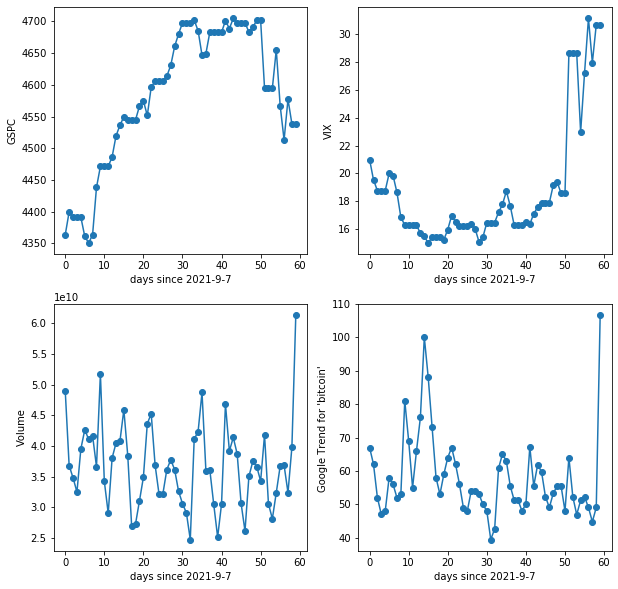

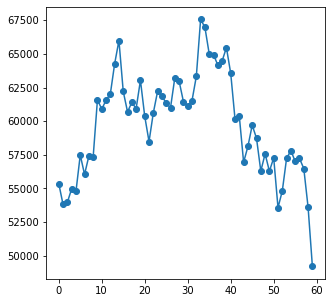

In [15]:
# plotting each variable
data.plot_data(start_date,end_date)

In [16]:
full_data = data.gather_data(start_date, end_date)
full_data.head()

loading additional data from  2022-01-03 00:00:00 to,  2022-01-05 15:17:53.252400
overlap 2022-01-03T00:00:00.000000000


,Date,^GSPC,^VIX,Volume,BTC-USD,bitcoin
0,2021-10-06,4363.549805,21.000000,49034730168,55361.449219,67.0
1,2021-10-07,4399.759766,19.540001,36807860413,53805.984375,62.0
2,2021-10-08,4391.339844,18.770000,34800873924,53967.847656,52.0
3,2021-10-09,4391.339844,18.770000,32491211414,54968.222656,47.0
4,2021-10-10,4391.339844,18.770000,39527792364,54771.578125,48.0


In [21]:
full_data.tail()

,Date,^GSPC,^VIX,Volume,BTC-USD,bitcoin
85,2021-12-30,4778.729980,17.330000,26686491018,47178.125000,49.834667
86,2021-12-31,4766.180176,17.219999,36974172400,46306.445312,45.162667
87,2022-01-01,4766.180176,17.219999,24582667004,47686.812500,44.384000
88,2022-01-02,4766.180176,17.219999,27951569547,47345.218750,43.605333
89,2022-01-03,4796.560059,16.600000,33071628362,46458.117188,44.953952


### Analyzing the trend of google trends vs bitcoin price

In [17]:
from sklearn.preprocessing import MinMaxScaler

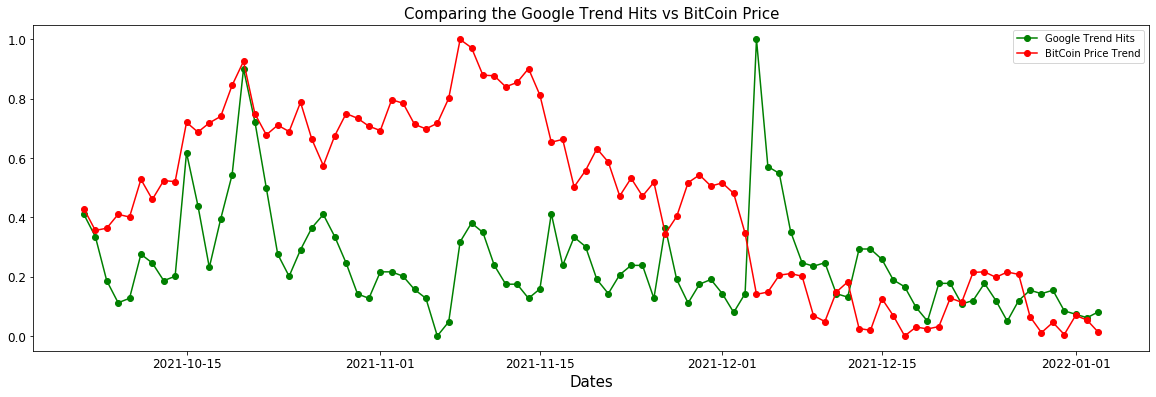

In [18]:
grouped_data = full_data.set_index("Date")
min_max_scaler = MinMaxScaler()
bitcoin_value = grouped_data["BTC-USD"]
bitcoin_value = np.array(bitcoin_value)
bitcoin_value = bitcoin_value.reshape(-1, 1)
grouped_data["BTC-USD"] = min_max_scaler.fit_transform(X = bitcoin_value)

bitcoin_value = grouped_data["bitcoin"]
bitcoin_value = np.array(bitcoin_value)
bitcoin_value = bitcoin_value.reshape(-1, 1)
grouped_data["bitcoin"] = min_max_scaler.fit_transform(X = bitcoin_value)

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(grouped_data.loc[:,"bitcoin"], marker = 'o', color='g', label="Google Trend Hits")
ax.plot(grouped_data.loc[:,"BTC-USD"], marker = 'o', color='r', label="BitCoin Price Trend")

ax.set_xlabel("Dates",size=15)
ax.set_title("Comparing the Google Trend Hits vs BitCoin Price",size=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.legend();
plt.show()

In [19]:
grouped_data

,^GSPC,^VIX,Volume,BTC-USD,bitcoin
Date,,,,,
2021-10-06,4363.549805,21.000000,49034730168,0.428712,0.409722
2021-10-07,4399.759766,19.540001,36807860413,0.355907,0.335317
2021-10-08,4391.339844,18.770000,34800873924,0.363483,0.186508
2021-10-09,4391.339844,18.770000,32491211414,0.410307,0.112103
2021-10-10,4391.339844,18.770000,39527792364,0.401103,0.126984
...,...,...,...,...,...
2021-12-30,4778.729980,17.330000,26686491018,0.045682,0.154286
2021-12-31,4766.180176,17.219999,36974172400,0.004882,0.084762
2022-01-01,4766.180176,17.219999,24582667004,0.069492,0.073175


In [20]:
X,y = data.train_data(start_date,end_date)
model.fit(X,y)  # train the model on data
# print('finish training')
# model.save()

X_,y_ = data.test_data(start_date,end_date)
y_predicted = model.predict(X_)
print(r2_score(y_, y_predicted))

loading additional data from  2022-01-03 00:00:00 to,  2022-01-05 15:17:53.252400
overlap 2022-01-03T00:00:00.000000000
loading additional data from  2022-01-03 00:00:00 to,  2022-01-05 15:17:53.252400
overlap 2022-01-03T00:00:00.000000000
-33.71617700799999
